In [40]:
#Predicting Microsoft stock price
#yfinance is a library that let you download Yahoo stock prices.Yahoo
#API has been deprecated. 

import yfinance as yf

msft = yf.Ticker("MSFT") # Ticker object
msft_hist = msft.history(period="max")


In [41]:
msft_hist.head(5) # First 5 items in the time series data where every
# represents a certain date/time in sequence

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13,0.055653,0.063838,0.055653,0.061109,1031788800,0.0,0.0
1986-03-14,0.061109,0.064384,0.061109,0.063292,308160000,0.0,0.0
1986-03-17,0.063292,0.064929,0.063292,0.064384,133171200,0.0,0.0
1986-03-18,0.064383,0.064929,0.062201,0.062746,67766400,0.0,0.0
1986-03-19,0.062746,0.063292,0.061109,0.061655,47894400,0.0,0.0


<AxesSubplot:xlabel='Date'>

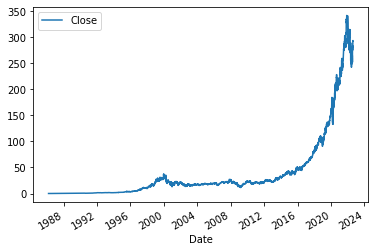

In [42]:
msft_hist.plot.line( y="Close" , use_index=True)

In [43]:
data = msft_hist[["Close"]]
data = data.rename(columns = {'Close':'Actual Close'})
data["Target"] = msft_hist.rolling(2).apply(lambda x: x.iloc[1] > x.iloc[0])["Close"]
#This is the target. This is what we want the ML Algorithm to predict

data["Target"].value_counts() # Here we are trying to make sure that we have a roughly balanced dataset.

1.0    4643
0.0    4538
Name: Target, dtype: int64

In [44]:
data.head(5)

,Actual Close,Target
Date,,
1986-03-13,0.061109,NaN
1986-03-14,0.063292,1.0
1986-03-17,0.064384,1.0
1986-03-18,0.062746,0.0
1986-03-19,0.061655,0.0


In [45]:
type(data)

pandas.core.frame.DataFrame

In [46]:
msft_prev = msft_hist.copy()
msft_prev = msft_hist.shift(1)# Here we are shifting the data by 1 column in order to make sure that the data is used from the previous day is used to predict what happend the following day
msft_prev.head(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986-03-14,0.055653,0.063838,0.055653,0.061109,1.031789e+09,0.0,0.0
1986-03-17,0.061109,0.064384,0.061109,0.063292,3.081600e+08,0.0,0.0
1986-03-18,0.063292,0.064929,0.063292,0.064384,1.331712e+08,0.0,0.0
1986-03-19,0.064383,0.064929,0.062201,0.062746,6.776640e+07,0.0,0.0


In [47]:
predictors = ["Close", "High", "Low", "Open", "Volume"]
data = data.join(msft_prev[predictors]).iloc[1:] 

In [48]:
data.head(5)

,Actual Close,Target,Close,High,Low,Open,Volume
Date,,,,,,,
1986-03-14,0.063292,1.0,0.061109,0.063838,0.055653,0.055653,1.031789e+09
1986-03-17,0.064384,1.0,0.063292,0.064384,0.061109,0.061109,3.081600e+08
1986-03-18,0.062746,0.0,0.064384,0.064929,0.063292,0.063292,1.331712e+08
1986-03-19,0.061655,0.0,0.062746,0.064929,0.062201,0.064383,6.776640e+07
1986-03-20,0.060018,0.0,0.061655,0.063292,0.061109,0.062746,4.789440e+07


In [49]:
from sklearn.ensemble import RandomForestClassifier # This model is a good default model to be used for most ML. It can identify non-linear relationships in the data. We are using
#RandomForestClassifier here instead of RandomForestRegerssor because the Target is binary. Basically a Logistic Regression case.

model = RandomForestClassifier(n_estimators=100, min_samples_split=200, random_state=1) # Initialize the model. n_estimators is the number of decision trees we want to use. min_samples_split: This number helpe the model
                               #not become over-fitted where it performs well with the training data and poorly with estimated data. random_state: if it's set to 1 and you run the model over and over again
                               # on the same data, you will get the same result)
        

In [50]:
train = data.iloc[:-100] # take the whole data minus the last 100
test = data.iloc[-100:] # So here this is the last 100 data we are saving them for testing only. So we are training the model with "train" and testing it with "test". 
#Typically you would use Crossvalidation method.

model.fit(train[predictors],train["Target"]) # Here we are fitting a cruve or training the model with our data.



RandomForestClassifier(min_samples_split=200, random_state=1)

In [51]:
from sklearn.metrics import precision_score

#Compute the precision. The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. 
#The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.
#The best value is 1 and the worst value is 0.

preds = model.predict(test[predictors])

In [52]:
preds

array([0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.])

In [53]:
#in order to easily compare what the model predicted vs what actually happened in the last 100 days, we need to convert preds to panda time series
import pandas as pd
preds = pd.Series(preds, index=test.index)

In [54]:
preds

Date
2022-03-24    0.0
2022-03-25    1.0
2022-03-28    0.0
2022-03-29    1.0
2022-03-30    1.0
             ... 
2022-08-10    0.0
2022-08-11    0.0
2022-08-12    0.0
2022-08-15    0.0
2022-08-16    0.0
Length: 100, dtype: float64

In [55]:
precision_score(test["Target"],preds)# This result shows how we scored on the last 100 only. Whether it's good or bad you can't trust it because you aren't doing enought testing.
# You need to test across the entire history to get better assesment of the model.

0.5189873417721519

In [56]:
combined = pd.concat({"Target": test["Target"], "Predictions":preds},axis=1)
combined

,Target,Predictions
Date,,
2022-03-24,1.0,0.0
2022-03-25,0.0,1.0
2022-03-28,1.0,0.0
2022-03-29,1.0,1.0
2022-03-30,0.0,1.0
...,...,...
2022-08-10,1.0,0.0
2022-08-11,0.0,0.0
2022-08-12,1.0,0.0


<AxesSubplot:xlabel='Date'>

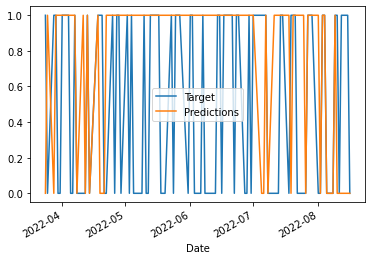

In [57]:
combined.plot() #pandas plots every column against the index automatically.

In [58]:
# Now we will implement backtesting:

start = 1000
step=750 # in the real world, set this to 100 (smaller step)
#i=1000

def backtest(data, model, predictors, start = 1000, step = 750):
    predictions = []

    for i in range (start, data.shape[0], step):

        train = data.iloc[0:i].copy()
        test = data.iloc[i:i+step].copy()

        # Now we can fit the model again using the new train set we defined.

        model.fit(train[predictors], train["Target"])

        # Now we need to test the model but we will test it with a different function: model.predict_proba.
        # This function gives you the probability that the outome is 0 or 1 and you can set the threshould later.

        preds= model.predict_proba(test[predictors])[:,1]

        preds[preds >0.6] = 1
        preds[preds <=0.6] = 0

        preds = pd.Series(preds, index=test.index)
        combined = pd.concat({"Target": test["Target"], "Predictions":preds}, axis = 1)

        predictions.append(combined)

    predictions = pd.concat(predictions)
    
    return predictions




In [ ]:
precision_score(predictions["Target"], predictions["Predictions"]) # it's 0.5. That means when we predict 
# that the price go up, it only goes up 50% of the time.

In [ ]:
# Since our accuracy isn't accurate, we need to try to improve the accuracy. We can do that by
# adding more predictors.

In [64]:
weekly_mean = data.rolling(7).mean()
quarterly_mean = data.rolling(90).mean()
annual_mean = data.rolling(365).mean()

weekly_trend = data.shift(1).rolling(7).mean()["Target"] # This looks at the last 7 days and determines
# on average what was the precentage the price would go up

In [65]:
#temp = [ weekly_mean["Target"], weekly_trend]
#temp1 = pd.concat(temp, axis=1)
#temp1.head(20)

In [66]:
# these new columns help the model when we train it ebcause we are giving more data for the overall picture.
data["weekly_mean"] = weekly_mean["Close"] / data["Close"]
data["quarterly_mean"] = quarterly_mean["Close"] / data["Close"]
data["annual_mean"] = annual_mean["Close"] / data["Close"]

data["annual_weekly_mean"] = data["annual_mean"] / data["weekly_mean"]
data["annual_quarterly_mean"] = data["annual_mean"] / data["quarterly_mean"]
data["weekly_trend"] = weekly_trend

data["open_close_ratio"] = data["Open"] / data["Close"]
data["high_close_ratio"] = data["High"] / data["Close"]
data["low_close_ratio"] = data["Low"] / data["Close"]

full_predictors = predictors + ["weekly_mean", "quarterly_mean", "annual_mean", "annual_weekly_mean", "annual_quarterly_mean", "open_close_ratio", "high_close_ratio", "low_close_ratio", "weekly_trend"]
predictions = backtest(data.iloc[365:], model, full_predictors)


In [63]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5748792270531401

In [67]:
# Show how many trades we would make

predictions["Predictions"].value_counts()

0.0    7613
1.0     203
Name: Predictions, dtype: int64

<AxesSubplot:xlabel='Date'>

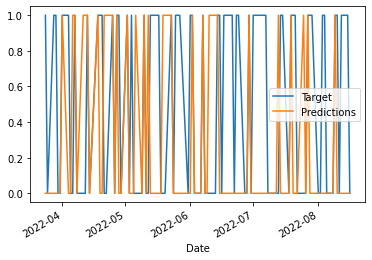

In [68]:

predictions.iloc[-100:].plot()